In [29]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X.shape,y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [20]:
import torch
from torch import nn
import matplotlib.pyplot as plt

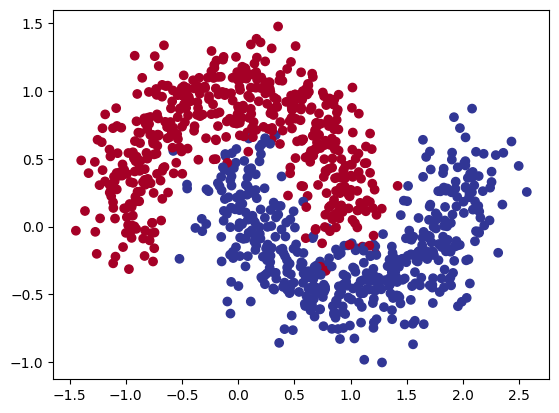

In [21]:
plt.scatter(X[:,0],X[:,1], c= y,cmap = plt.cm.RdYlBu)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

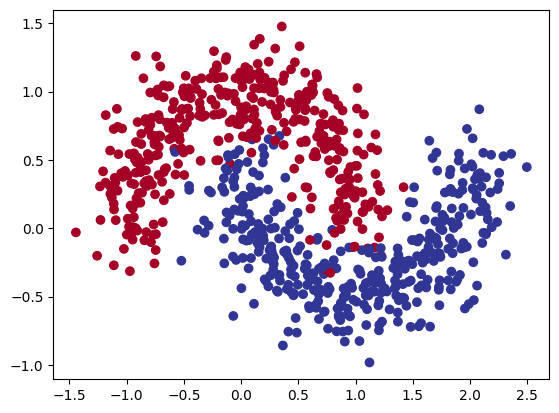

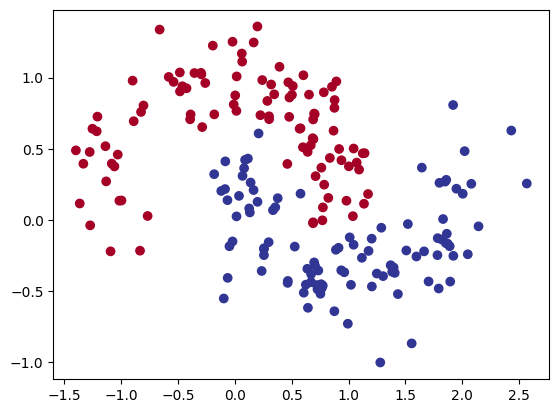

In [23]:
plt.scatter(X_train[:,0],X_train[:,1], c= y_train,cmap = plt.cm.RdYlBu, label="Train")
plt.show()
plt.scatter(X_test[:,0],X_test[:,1], c= y_test,cmap = plt.cm.RdYlBu, label="Test")
plt.show()

In [63]:
device ="cuda"

In [64]:
class MoonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=2,out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=1)
        )
    def forward(self,X):
        return self.model(X)
model = MoonModel().to(device)
model

MoonModel(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [73]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.01)

In [74]:
from torchmetrics import Accuracy
accuracy = Accuracy(task='binary').to(device)

In [69]:
y_train[:10]

tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0.], device='cuda:0')

In [76]:
epochs = 1000
# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
model = model.to(device)
for epoch in range(epochs):
    model.train()
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        y_test_logits = model(X_test).squeeze()
        y_test_pred = torch.round(torch.sigmoid(y_test_logits))
        test_loss = loss_fn(y_test_logits, y_test)
        test_acc = accuracy(y_test_pred, y_test)

    if epoch%10 ==0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Train acc: {acc:.2f} | Test loss: {test_loss:5f} | Test acc: {test_acc:.2f}")

    

Epoch: 0 | Train loss: 0.20027464628219604 | Train acc: 0.91 | Test loss: 0.194259 | Test acc: 0.93
Epoch: 10 | Train loss: 0.19999389350414276 | Train acc: 0.91 | Test loss: 0.193955 | Test acc: 0.93
Epoch: 20 | Train loss: 0.19971251487731934 | Train acc: 0.91 | Test loss: 0.193651 | Test acc: 0.93
Epoch: 30 | Train loss: 0.19943057000637054 | Train acc: 0.91 | Test loss: 0.193346 | Test acc: 0.93
Epoch: 40 | Train loss: 0.19914813339710236 | Train acc: 0.91 | Test loss: 0.193040 | Test acc: 0.93
Epoch: 50 | Train loss: 0.1988651305437088 | Train acc: 0.91 | Test loss: 0.192734 | Test acc: 0.93
Epoch: 60 | Train loss: 0.198582261800766 | Train acc: 0.91 | Test loss: 0.192428 | Test acc: 0.93
Epoch: 70 | Train loss: 0.19829916954040527 | Train acc: 0.91 | Test loss: 0.192121 | Test acc: 0.93
Epoch: 80 | Train loss: 0.1980152428150177 | Train acc: 0.91 | Test loss: 0.191813 | Test acc: 0.93
Epoch: 90 | Train loss: 0.19773097336292267 | Train acc: 0.91 | Test loss: 0.191505 | Test acc: 

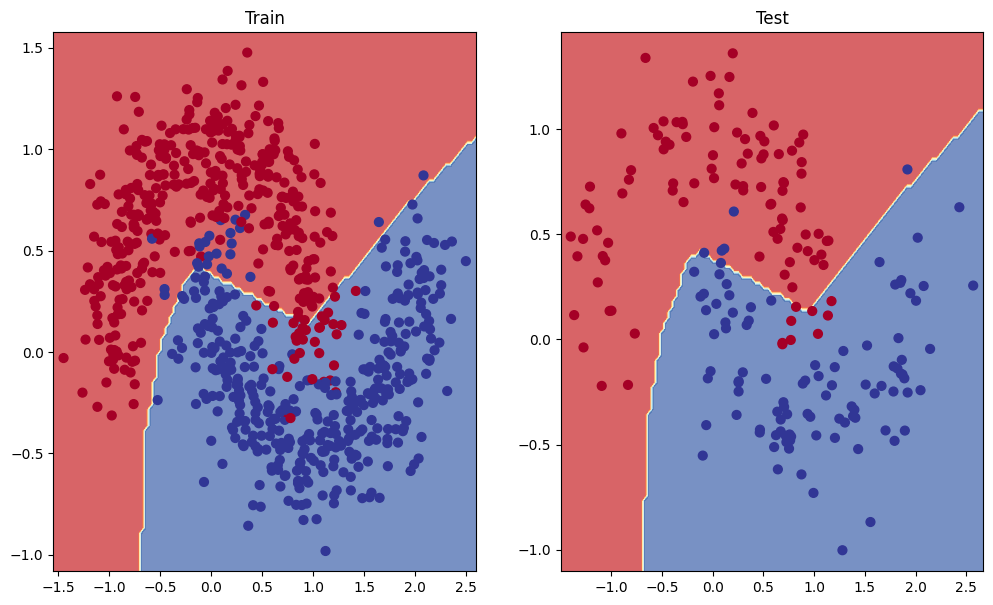

In [77]:
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test,y_test)